# Entregable Etapa 3: Generación de Modelos de Aprendizaje y Evaluación de los mismos



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Análisis de ciencia de datos/Reto/BD RIIEE 2021.csv')
df

# Comprensión de los datos del negocio

In [ ]:
df.columns

### a) Dimensión del dataset

In [ ]:
df.shape

In [ ]:
df.size

### b) Describe claramente cada uno de los datos

In [ ]:
df.info()

In [ ]:
df.describe()

### c) Exploración de los datos

Variables cuantitativas:

- Medidas de tendencia central:promedio, media, mediana y moda de los datos.
- Medidas de dispersión: rango: máximo - mínimo, varianza, desviación estándar.

#### 1) Medidas estadísticas

In [ ]:
df.mean(numeric_only= True)

In [ ]:
df.median()

In [ ]:
df.mode().head(1)

Variables cualitativas:

- Tabla de distribución de frecuencia
- Moda



#### 2) Explora los datos usando herramientas de visualización

Variables cuantitativas:
Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots

*   Variables cuantitativas:
    *   Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots.
    *   Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica.
    *   Análisis de correlación  de los datos, mapa de color.






In [ ]:
df.boxplot(column=['VIPS'], grid=True, color='black')

In [ ]:
dfH=df['VIPS']
dfH.plot.hist()

In [ ]:
df.boxplot(column=['NIPS'], grid=True, color='black')

In [ ]:
dfH2=df['NIPS']
dfH2.plot.hist()

In [ ]:
r=df[['VIPS','NIPS']]
cor=r.corr(method='pearson')
cor

In [ ]:
import seaborn as sns
numericas = df.select_dtypes(include = ["float64"])
sns.heatmap(numericas)

In [ ]:
sns.heatmap(r)

In [ ]:
r.plot.scatter(x='NIPS',y='VIPS')



*   Variables categóricas
  *   Distribución de los datos (diagramas de barras, diagramas de pastel)




In [ ]:
from matplotlib import pyplot as plt

columnas = ['Fecha Acción', 'PEA', 'Periodo Acción', 'País',
       'Tipo de Acción ', 'Acción', 'Nombre Evento',
       'Institución Acción', 'Referente Ternium',
       'Género', 'Nacionalidad', 'Universidad',
       'Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Avance',
       'Semestres Totales', 'Status Académico', 'Postulados Si/No',
       'Evaluados Si/No', 'Perfil Pymetrics', 'Altamente Recomendado',
       'Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC',
       'Resto-Soft', 'Apto/No Apto', 'Destacado Pym', 'Actividad Grupal.1',
       'Apto AG', 'Ingles', 'Apto', 'Destacado',
       'Ingresados Si/No']

for col in columnas:
  print('********** Exploración sobre',col,'**********')
  print(df[col].value_counts())
  print(df[col].mode())
  # ax = df[col].value_counts().plot(kind='barh', figsize=(14,8))
  # plt.show()
  print('\n')

### d) Verifica la calidad de los datos: valores faltantes, valores de los datos, ortografía

In [ ]:

nan_count = df.isnull().sum()
nan_count[0:56]

In [ ]:
totalC = np.product(df.shape)
totalM = nan_count.sum()
print("El porcentaje de datos faltantes en la base de datos es de:")
(totalM/totalC) * 100


# Preparación de los datos

## 1. Selecciona el conjunto de datos a utilizar.

Aquí falta esto
a) Decide qué conjunto de datos se utilizará. Explica por qué se incluyeron o excluyeron ciertos datos.
b) Identifica columna objetivo

In [24]:
df = pd.read_csv('/content/drive/Shareddrives/Análisis de ciencia de datos/Reto/BD RIIEE 2021.csv')


In [25]:
df = df[df['País'] == 'México']
df

,Fecha Acción,PEA,Año Acción,Periodo Acción,País,Tipo de Acción,Acción,ID Evento,Nombre Evento,Institución Acción,...,Apto,Destacado,Ingresados Si/No,Encuadre de Ingreso,Dirección,Área,Potencial Vigente,Información Real/No Real,Vacante Postulada,Ingresó
0,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento,TM,...,Apto,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 4,U,...,Apto,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 5,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 0,IY,...,Apto,Si,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2021,PEA 20-21,2021.0,Enero-Junio,México,Targetizada,Ternium Contact,1.202101e+10,Evento 4,TM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,20/20/2021,PEA 21-22,2021.0,Julio-Diciembre,México,Masiva,Eventos de Reclutamiento,NaN,Evento 68,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4802,20/20/2021,PEA 21-22,2021.0,Julio-Diciembre,México,Masiva,Eventos de Reclutamiento,NaN,Evento 68,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4803,20/20/2021,PEA 21-22,2021.0,Julio-Diciembre,México,Masiva,Eventos de Reclutamiento,NaN,Evento 68,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4804,20/20/2021,PEA 21-22,2021.0,Julio-Diciembre,México,Masiva,Eventos de Reclutamiento,NaN,Evento 68,RR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.drop_duplicates(subset ="ID Candidato",
                     keep = False, inplace = True)
df = df.drop(['Embajador Ternium', 'Destacado AG', 'Inglés', 'Actividad Grupal', 'Multimodelo Pymetrics',
       'Encuadre de Ingreso', 'Dirección', 'Área', 'Status Académico',
       'Potencial Vigente', 'Información Real/No Real', 'Vacante Postulada',
       'Ingresó', 'VIPS', 'NIPS', 'Apto AG', 'Destacado Pym', 'Universidad'], axis=1)
df = df.drop(['Fecha Acción', 'PEA', 'Año Acción', 'Periodo Acción', 'País',
       'Tipo de Acción ', 'Acción', 'ID Evento', 'Nombre Evento', 'Apto', 'Apto/No Apto',
       'Institución Acción', 'Referente Ternium', 'Postulados Si/No', 'Perfil Pymetrics',
       'ID Candidato', 'Correo electrónico', 'Correo institucional', 'Nombres',
       'Apellidos', 'Género', 'Nacionalidad'], axis=1)

In [27]:
df

,Carrera/Titulación,Carrera Gestional,Especialidad,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No
0,Ing. Industrial,Ing. Industrial,Ingenierías Target,NaN,NaN,Si,Si,Highly Recommend,Recommend,Highly Recommend,Do Not Recommend,Do Not Recommend,5,B2 - High Intermediate,Si,Si
1,Ing. Industrial,Ing. Industrial,Ingenierías Target,6,9,Si,Si,Highly Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,Do Not Recommend,5,B2 - High Intermediate,Si,NaN
2,Ing. Industrial,Ing. Industrial,Ingenierías Target,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ing. Mecatrónica,Ing. Mecatrónica/Electrónica,Ingenierías Target,6,9,Si,Si,Highly Recommend,Highly Recommend,Do Not Recommend,Recommend,Highly Recommend,5,B2 - High Intermediate,Si,Si
4,Comercio Exterior,Negocios Internacionales,Negocios,NaN,NaN,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,Administración,Administración,Negocios,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,Administración,Administración,Negocios,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2590,Administración,Administración,Negocios,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2591,Administración,Administración,Negocios,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2593 entries, 0 to 2592
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Carrera/Titulación      2593 non-null   object
 1   Carrera Gestional       2593 non-null   object
 2   Especialidad            2593 non-null   object
 3   Avance                  2547 non-null   object
 4   Semestres Totales       1815 non-null   object
 5   Evaluados Si/No         509 non-null    object
 6   Altamente Recomendado   239 non-null    object
 7   Operaciones-Calidad     432 non-null    object
 8   MTTO-DIMA               432 non-null    object
 9   Comercial-Planeamiento  432 non-null    object
 10  DIGI-SC                 432 non-null    object
 11  Resto-Soft              432 non-null    object
 12  Actividad Grupal.1      45 non-null     object
 13  Ingles                  124 non-null    object
 14  Destacado               25 non-null     object
 15  Ingr

In [29]:
df.columns

Index(['Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Avance',
       'Semestres Totales', 'Evaluados Si/No', 'Altamente Recomendado',
       'Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC',
       'Resto-Soft', 'Actividad Grupal.1', 'Ingles', 'Destacado',
       'Ingresados Si/No'],
      dtype='object')

## 2. Limpieza de datos

### Limpieza de columnas numéricas

#### Sustituir datos faltantes en Avance

In [30]:
df['Avance'].unique()

array([nan, '6', '8', '9', '10', '7', '5', '4', '12', '11', 'Egresado',
       '2', '3'], dtype=object)

In [31]:
notegresados = df[df.Avance != 'Egresado']
notegresados['Avance'] = notegresados['Avance'].apply(pd.to_numeric, errors='coerce')
notegresados.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Avance    7.47685
dtype: float64

In [32]:
df['Avance'] = df['Avance'].fillna(7)
df['Avance'].replace({'Egresado':13}, inplace=True)
df['Avance'] = df['Avance'].apply(pd.to_numeric, errors='coerce')

#### Sustituir datos faltantes en Semestres Totales

In [33]:
df['Semestres Totales'].unique()

array([nan, '9', '10'], dtype=object)

In [34]:
df['Semestres Totales'] = df['Semestres Totales'].apply(pd.to_numeric, errors='coerce')
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Avance               7.971076
Semestres Totales    9.623691
dtype: float64

In [35]:
df['Semestres Totales'] = df['Semestres Totales'].fillna(10)
df['Semestres Totales'].unique()

array([10.,  9.])

In [36]:
#Utilizar las reglas proporcionadas por la empresa para determinar si es o no apto
#considerando que el postulante pueda ser practicante con respecto a su avance de estudios:
# df['Filtro 1'] = df['Semestres Totales']-df['Avance']
# df['Filtro 1'] = np.where((df['Filtro 1']> 1) & (df['Avance'] >= 5), 'Aplica', 'No aplica')

df = df[(df['Avance'] > 4)]
vacante = np.where((df['Semestres Totales']-df['Avance'] > 1) & (df['Avance'] != 13), 'Practicante', 'Profesional')
df.insert(3, 'Vacante', vacante)

In [37]:
df.Vacante.value_counts()

Practicante    1238
Profesional    1093
Name: Vacante, dtype: int64

### Gráficas

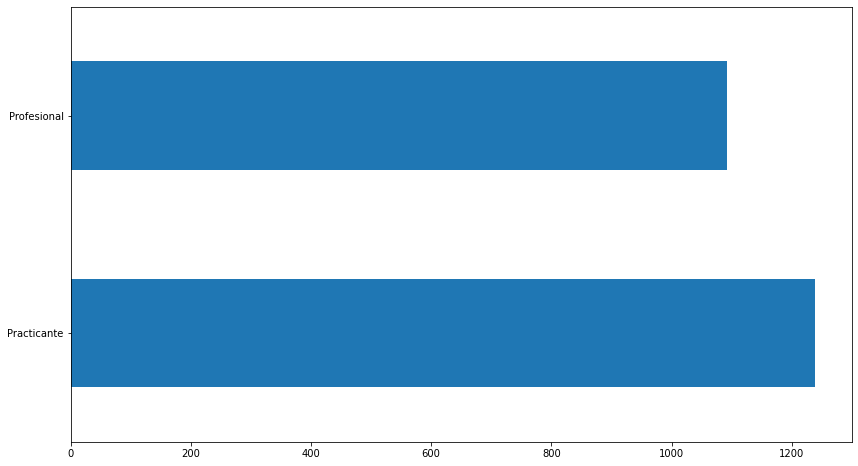

In [38]:
from matplotlib import pyplot as plt

ax = df['Vacante'].value_counts().plot(kind='barh', figsize=(14,8))
plt.show()

### Limpieza de columnas binarias

In [39]:
colBinarias = ['Evaluados Si/No', 'Altamente Recomendado', 'Destacado', 'Ingresados Si/No']

# dict_orthography = {'No':'No', 'no':'No', 'NO':'No', 'nO':'No', 'Sí':'Sí', 'Si':'Sí', 'SÍ':'Sí'}
dict_binary = {np.nan:0, 'No':0, 'no':0, 'NO':0, 'nO':0, 'Sí':1, 'Si':1, 'SÍ':1, 'Lic. Química': 'Química', 'Lic. en Química': 'Química'}
for col in colBinarias:
  # df.replace({col : dict_orthography}, inplace=True)
  # # df[col] = df[col].fillna(df[col].mode())
  # df.replace({col: {np.nan:df[col].mode()}}, inplace=True)
  df.replace({col: dict_binary}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2592
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Carrera/Titulación      2331 non-null   object 
 1   Carrera Gestional       2331 non-null   object 
 2   Especialidad            2331 non-null   object 
 3   Vacante                 2331 non-null   object 
 4   Avance                  2331 non-null   int64  
 5   Semestres Totales       2331 non-null   float64
 6   Evaluados Si/No         2331 non-null   int64  
 7   Altamente Recomendado   2331 non-null   int64  
 8   Operaciones-Calidad     423 non-null    object 
 9   MTTO-DIMA               423 non-null    object 
 10  Comercial-Planeamiento  423 non-null    object 
 11  DIGI-SC                 423 non-null    object 
 12  Resto-Soft              423 non-null    object 
 13  Actividad Grupal.1      44 non-null     object 
 14  Ingles                  122 non-null    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Limpieza en columnas categóricas

Do Not Recommend: 0  
Recommend: 1  
Highly Recommend: 2

In [40]:
colCategoricas = ['Operaciones-Calidad', 'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC', 'Resto-Soft']

dict_categorical = {np.nan:0, 'Do Not Recommend':0, 'Recommend':1, 'Highly Recommend':2}
for col in colCategoricas:
  # df[col] = df[col].fillna(df[col].mode())
  # df.replace({col: {np.nan:df[col].mode()}}, inplace=True)
  df.replace({col: dict_categorical},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [41]:
# df.replace({'Actividad Grupal.1': {np.nan : 4}})
df.replace({'Actividad Grupal.1': {np.nan:0, 1:0, 2:0, 3:1, 4:1, 5:2, 6:2}},inplace=True)
df['Actividad Grupal.1'] = df['Actividad Grupal.1'].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
# df.replace({'Ingles' : {np.nan : df['Ingles'].mode()}})
df.replace({'Ingles': {np.nan :1, 'B2 - High Intermediate':2, 'B1 - Low Intermediate':2,
       'A1 - Low Beginner':1, 'A2 - High Beginner':1, 'C2 - Mastery':2,
       'C1 - Advanced':2, 'False Beginner':1, 'Late hangup':1 }},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2592
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Carrera/Titulación      2331 non-null   object 
 1   Carrera Gestional       2331 non-null   object 
 2   Especialidad            2331 non-null   object 
 3   Vacante                 2331 non-null   object 
 4   Avance                  2331 non-null   int64  
 5   Semestres Totales       2331 non-null   float64
 6   Evaluados Si/No         2331 non-null   int64  
 7   Altamente Recomendado   2331 non-null   int64  
 8   Operaciones-Calidad     2331 non-null   int64  
 9   MTTO-DIMA               2331 non-null   int64  
 10  Comercial-Planeamiento  2331 non-null   int64  
 11  DIGI-SC                 2331 non-null   int64  
 12  Resto-Soft              2331 non-null   int64  
 13  Actividad Grupal.1      2331 non-null   int64  
 14  Ingles                  2331 non-null   

-------------------------------------------------------------------------------

In [44]:
df

,Carrera/Titulación,Carrera Gestional,Especialidad,Vacante,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No
0,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,7,10.0,1,1,2,1,2,0,0,5,2,1,1
1,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,6,9.0,1,1,2,0,0,0,0,5,2,1,0
2,Ing. Industrial,Ing. Industrial,Ingenierías Target,Profesional,8,9.0,0,0,0,0,0,0,0,0,1,0,0
3,Ing. Mecatrónica,Ing. Mecatrónica/Electrónica,Ingenierías Target,Practicante,6,9.0,1,1,2,2,0,1,2,5,2,1,1
4,Comercio Exterior,Negocios Internacionales,Negocios,Practicante,7,10.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0
2587,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0
2588,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0
2590,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0


## 3. Transformación de Datos:

Debido a que no se contaba con muchas variables numéricas y con las que se contaban eran valores muy cercanos, no vimos la necesidad de discretizar ni normalizar los datos.

### Crear atributo para determinar si es apto




In [45]:
df

,Carrera/Titulación,Carrera Gestional,Especialidad,Vacante,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No
0,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,7,10.0,1,1,2,1,2,0,0,5,2,1,1
1,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,6,9.0,1,1,2,0,0,0,0,5,2,1,0
2,Ing. Industrial,Ing. Industrial,Ingenierías Target,Profesional,8,9.0,0,0,0,0,0,0,0,0,1,0,0
3,Ing. Mecatrónica,Ing. Mecatrónica/Electrónica,Ingenierías Target,Practicante,6,9.0,1,1,2,2,0,1,2,5,2,1,1
4,Comercio Exterior,Negocios Internacionales,Negocios,Practicante,7,10.0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0
2587,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0
2588,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0
2590,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
def conditions(s):
  if (s['Altamente Recomendado'] == 19):
    return 2
  elif (s['Operaciones-Calidad']==2 or s['MTTO-DIMA']==2 or s['Comercial-Planeamiento']==2 or s['DIGI-SC']==2):
    return 2
  elif (s['Operaciones-Calidad']==1 or s['MTTO-DIMA']==1 or s['Comercial-Planeamiento']==1 or s['DIGI-SC']==1):
    return 1
  elif (s['Resto-Soft'] == 2):
    return 1
  elif (s['Operaciones-Calidad']==0 and s['MTTO-DIMA']==0 and s['Comercial-Planeamiento']==0 and s['DIGI-SC']==0):
    return 0
  elif (s['Actividad Grupal.1'] == 2):
    return 2
  elif (s['Actividad Grupal.1'] == 1):
    return 1
  elif (s['Actividad Grupal.1'] == 0):
    return 0
  elif (s['Ingles'] == 2):
    return 2
  elif (s['Ingles'] == 1):
    return 1

df['Apto'] = df.apply(conditions, axis=1)
df.Apto.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    1993
2     233
1     105
Name: Apto, dtype: int64

(array([1993.,    0.,    0.,    0.,    0.,  105.,    0.,    0.,    0.,
         233.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

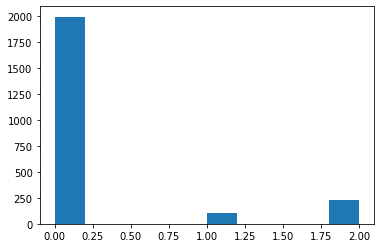

In [47]:
from matplotlib import pyplot as plt

plt.hist(df['Apto'])

In [48]:
df['Apto suma'] = df['Altamente Recomendado'] + df['Operaciones-Calidad'] + df['MTTO-DIMA'] + df['Comercial-Planeamiento'] + df['DIGI-SC'] + df['Actividad Grupal.1'] + df['Ingles']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Carrera/Titulación,Carrera Gestional,Especialidad,Vacante,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No,Apto,Apto suma
0,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,7,10.0,1,1,2,1,2,0,0,5,2,1,1,2,13
1,Ing. Industrial,Ing. Industrial,Ingenierías Target,Practicante,6,9.0,1,1,2,0,0,0,0,5,2,1,0,2,10
2,Ing. Industrial,Ing. Industrial,Ingenierías Target,Profesional,8,9.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,Ing. Mecatrónica,Ing. Mecatrónica/Electrónica,Ingenierías Target,Practicante,6,9.0,1,1,2,2,0,1,2,5,2,1,1,2,13
4,Comercio Exterior,Negocios Internacionales,Negocios,Practicante,7,10.0,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0,0,1
2587,Administración,Administración,Negocios,Practicante,6,10.0,0,0,0,0,0,0,0,0,1,0,0,0,1
2588,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0,0,1
2590,Administración,Administración,Negocios,Practicante,8,10.0,0,0,0,0,0,0,0,0,1,0,0,0,1


(array([2.071e+03, 1.700e+01, 1.120e+02, 4.400e+01, 2.800e+01, 3.200e+01,
        1.000e+01, 1.200e+01, 4.000e+00, 1.000e+00]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <a list of 10 Patch objects>)

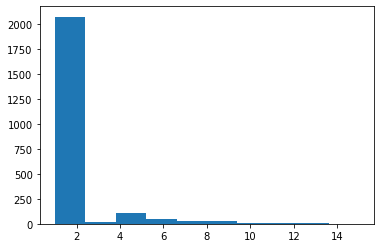

In [49]:
from matplotlib import pyplot as plt

plt.hist(df['Apto suma'])

In [50]:
df['Apto suma'].value_counts()

1     1997
2       74
4       69
6       44
5       43
7       28
3       17
9       16
8       16
10      10
12       6
11       6
13       4
15       1
Name: Apto suma, dtype: int64

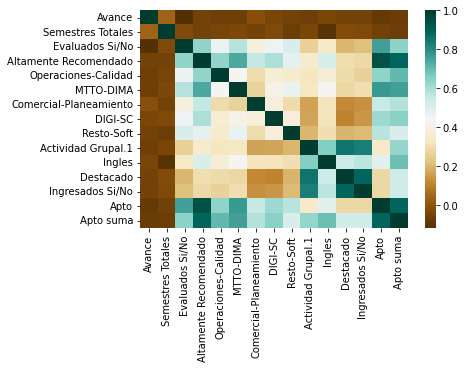

In [51]:
import seaborn as sns
num = df.select_dtypes(include = ["float64", "int64"])
sns.heatmap(df.corr(),cmap='BrBG')

# **ETAPA 3. GENERACIÓN DE MODELOS**

### Muestra la información general del set de datos a utilizar para la fase de modelación de datos.
Incluye un resumen con la descripción de las variables relevantes para el análisis.


In [52]:
df.describe()

,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Ingresados Si/No,Apto,Apto suma
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,8.436722,9.781639,0.213213,0.099957,0.096096,0.144573,0.071643,0.087516,0.108966,0.067782,1.030030,0.010725,0.012441,0.244959,1.597598
std,2.057063,0.413223,0.409665,0.300007,0.398750,0.480646,0.350986,0.364843,0.410340,0.502906,0.170707,0.103027,0.110867,0.620511,1.787240
min,5.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,8.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,13.000000,10.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,1.000000,1.000000,2.000000,15.000000


### Define la variable target, o de respuesta (dependiente) y las features o variables predictoras (independientes)


In [63]:
#Eliminar las variables categóricas 
# df = df.drop(['Carrera/Titulación', 'Carrera Gestional', 'Especialidad', 'Vacante'], axis=1)

#La variable target es si el postulante es apto o no 
target = "Ingresados Si/No"
y=df[target]
#LAs variables dependeintes son todas las demas características que se involucran para la evaluación de la columna "Apto"
X=df.drop("Ingresados Si/No",axis=1)
X

,Avance,Semestres Totales,Evaluados Si/No,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Ingles,Destacado,Apto,Apto suma
0,7,10.0,1,1,2,1,2,0,0,5,2,1,2,13
1,6,9.0,1,1,2,0,0,0,0,5,2,1,2,10
2,8,9.0,0,0,0,0,0,0,0,0,1,0,0,1
3,6,9.0,1,1,2,2,0,1,2,5,2,1,2,13
4,7,10.0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,6,10.0,0,0,0,0,0,0,0,0,1,0,0,1
2587,6,10.0,0,0,0,0,0,0,0,0,1,0,0,1
2588,8,10.0,0,0,0,0,0,0,0,0,1,0,0,1
2590,8,10.0,0,0,0,0,0,0,0,0,1,0,0,1


### Define qué tipos de modelos debes utilizar, de regresión ó de clasificación. Justifica tu respuesta.

El tipo de modelos que se utilizarán serán supervisados puesto que la base de datos con la que contamos se encuentra etiquetada. De igual manera, un clasificador es aquel algoritmo el cuál recibe como entrada cierta información de un objeto, y el output indica la categoría o clase a la que pertenece de entre un número acotado de clases posibles, en este caso, nuestro modelo recibirá como entrada distintas características del perfil de cada participante y en la salida indicará la categoría entre apto y no apto. 


### Define el dataset para entrenamiento y prueba.


In [64]:
from sklearn.model_selection import train_test_split

#Se sepaan los datos del dataset en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Prueba todos los modelos de clasificación vistos en clase para generar predicciones. Al utilizar árboles de decisión, genera también la imagen del mismo.

In [65]:
#K-NN

#Defino el algoritmo a utilizar
from sklearn.neighbors import KNeighborsClassifier
algoritmo = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)
y_pred

#Contar valores de cada resultado 
y_pred=y_pred.tolist()
for i in range(0,2):
  print(str(i) + ": " + str(y_pred.count(i)))

0: 462
1: 5


In [70]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
algoritmo = GaussianNB()
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)
y_pred

#Contar valores de cada resultado 
y_pred=y_pred.tolist()
for i in range(0,2):
  print(str(i) + ": " + str(y_pred.count(i)))

0: 434
1: 33


In [73]:
#SVC
from sklearn.svm import SVC
algoritmo = SVC(kernel = 'linear',probability = True)
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

#Contar valores de cada resultado 
y_pred=y_pred.tolist()
for i in range(0,2):
  print(str(i) + ": " + str(y_pred.count(i)))

0: 462
1: 5


In [71]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression(max_iter=10000)
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

#Contar valores de cada resultado 
y_pred=y_pred.tolist()
for i in range(0,2):
  print(str(i) + ": " + str(y_pred.count(i)))

0: 462
1: 5


In [72]:
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

#Contar valores de cada resultado 
y_pred=y_pred.tolist()
for i in range(0,2):
  print(str(i) + ": " + str(y_pred.count(i)))

0: 462
1: 5


In [ ]:
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)))

In [77]:
!pip install dtreeviz

In [ ]:
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
clf = y_pred
model = clf.fit(X, y)
viz = trees.dtreeviz(clf, X, y,
                target_name="Ingresado",
                feature_names=X.columns,
                class_names=list(df[target])
                )

In [79]:
#Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
algoritmo = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

#Contar valores de cada resultado 
y_pred=y_pred.tolist()
for i in range(0,2):
  print(str(i) + ": " + str(y_pred.count(i)))

0: 462
1: 5


### Calcula y utiliza métricas para comparar los modelos: accuracy, matriz de confusión, precisión, sensitividad, especificidad, ROC-AUC

In [107]:
#importar las librerías necesarias para probar los modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#importar las librerias para las metricas
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [108]:
#initialize the classifier models with their default parameters and add them to a model list.
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(probability= True)))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#redes neuronales
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)))


************************Modelo actual:  KNN ********************
Matriz de confusión: 
 [[461   1]
 [  1   4]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.80      0.80      0.80         5

    accuracy                           1.00       467
   macro avg       0.90      0.90      0.90       467
weighted avg       1.00      1.00      1.00       467


Sensitivity = 0.8
Accuracy =  0.9957173447537473
Precision =  0.8
Especifividad =  0.9978354978354979
F1 Score =  0.8000000000000002
AUC: 0.897835497835498


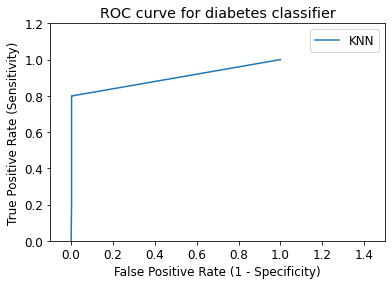

************************Modelo actual:  SVC ********************
Matriz de confusión: 
 [[460   2]
 [  1   4]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.67      0.80      0.73         5

    accuracy                           0.99       467
   macro avg       0.83      0.90      0.86       467
weighted avg       0.99      0.99      0.99       467


Sensitivity = 0.8
Accuracy =  0.9935760171306209
Precision =  0.6666666666666666
Especifividad =  0.9956709956709957
F1 Score =  0.7272727272727272
AUC: 0.9965367965367966


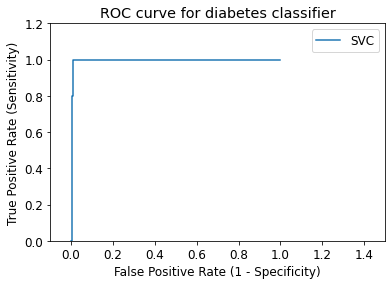

************************Modelo actual:  LR ********************
Matriz de confusión: 
 [[461   1]
 [  1   4]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.80      0.80      0.80         5

    accuracy                           1.00       467
   macro avg       0.90      0.90      0.90       467
weighted avg       1.00      1.00      1.00       467


Sensitivity = 0.8
Accuracy =  0.9957173447537473
Precision =  0.8
Especifividad =  0.9978354978354979
F1 Score =  0.8000000000000002
AUC: 0.9874458874458875


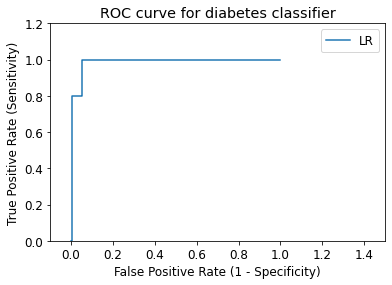

************************Modelo actual:  DT ********************
Matriz de confusión: 
 [[461   1]
 [  1   4]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.80      0.80      0.80         5

    accuracy                           1.00       467
   macro avg       0.90      0.90      0.90       467
weighted avg       1.00      1.00      1.00       467


Sensitivity = 0.8
Accuracy =  0.9957173447537473
Precision =  0.8
Especifividad =  0.9978354978354979
F1 Score =  0.8000000000000002
AUC: 0.898917748917749


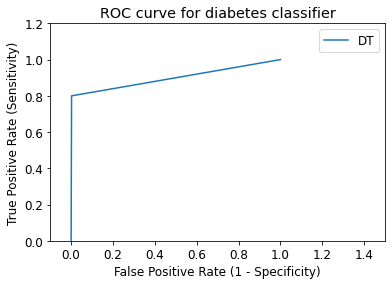

************************Modelo actual:  GNB ********************
Matriz de confusión: 
 [[434  28]
 [  0   5]]

               precision    recall  f1-score   support

           0       1.00      0.94      0.97       462
           1       0.15      1.00      0.26         5

    accuracy                           0.94       467
   macro avg       0.58      0.97      0.62       467
weighted avg       0.99      0.94      0.96       467


Sensitivity = 1.0
Accuracy =  0.9400428265524625
Precision =  0.15151515151515152
Especifividad =  0.9393939393939394
F1 Score =  0.2631578947368421
AUC: 0.9870129870129871


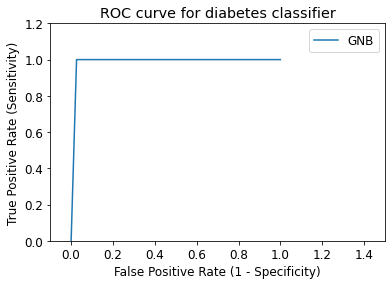

************************Modelo actual:  RF ********************
Matriz de confusión: 
 [[461   1]
 [  1   4]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.80      0.80      0.80         5

    accuracy                           1.00       467
   macro avg       0.90      0.90      0.90       467
weighted avg       1.00      1.00      1.00       467


Sensitivity = 0.8
Accuracy =  0.9957173447537473
Precision =  0.8
Especifividad =  0.9978354978354979
F1 Score =  0.8000000000000002
AUC: 0.998051948051948


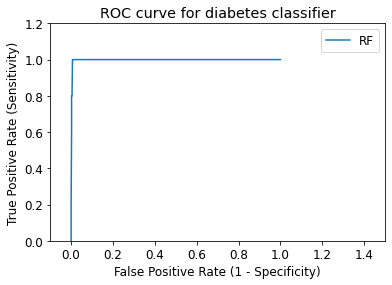

************************Modelo actual:  MLP ********************
Matriz de confusión: 
 [[461   1]
 [  1   4]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.80      0.80      0.80         5

    accuracy                           1.00       467
   macro avg       0.90      0.90      0.90       467
weighted avg       1.00      1.00      1.00       467


Sensitivity = 0.8
Accuracy =  0.9957173447537473
Precision =  0.8
Especifividad =  0.9978354978354979
F1 Score =  0.8000000000000002
AUC: 0.9948051948051948


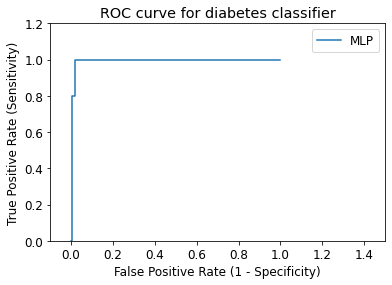



  Name  Sensitividad  Accuracy  Precision  Especificidad  F1 Score       AUC
0  KNN           0.8  0.995717   0.800000       0.997835  0.800000  0.897835
1  SVC           0.8  0.993576   0.666667       0.995671  0.727273  0.996537
2   LR           0.8  0.995717   0.800000       0.997835  0.800000  0.987446
3   DT           0.8  0.995717   0.800000       0.997835  0.800000  0.898918
4  GNB           1.0  0.940043   0.151515       0.939394  0.263158  0.987013
5   RF           0.8  0.995717   0.800000       0.997835  0.800000  0.998052
6  MLP           0.8  0.995717   0.800000       0.997835  0.800000  0.994805


In [114]:
#confusion matrix and the confusion report results on the training data.
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

names = []
scores = []
matriz = []
sensitividad=[]
accuracy =[]
precision = []
especificidad=[]
F1_Score=[]
AUC = []


#Ciclo para obtener las matrices de confusion y curvas ROC-AUC de todos los modelos 
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    y_pred_prob =model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test, y_pred_prob)


    names.append(name)

    print('************************Modelo actual: ', name, '********************')
    print("Matriz de confusión: \n",cfm)
    #
    TP = cfm[1, 1]
    TN = cfm[0, 0]
    FP = cfm[0, 1]
    FN = cfm[1, 0]

    print("\n", classification_report(y_test, y_pred))
    print("\nSensitivity =" ,TP / float(FN + TP) )
    sensitividad.append(TP / float(FN + TP) )
    print("Accuracy = ", accuracy_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    print("Precision = ", TP / float(TP + FP)) 
    precision.append(TP / float(TP + FP))
    print("Especifividad = ", TN / (TN + FP))
    especificidad.append(TN / (TN + FP))
    print("F1 Score = ", metrics.f1_score(y_test, y_pred))
    F1_Score.append( metrics.f1_score(y_test, y_pred))
    print("AUC:",auc )
    AUC.append(auc)


    plt.plot(fpr, tpr, label=name)
    plt.legend()
    plt.xlim([-0.1, 1.5])
    plt.ylim([0.0, 1.2])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')

    plt.grid(False)
    plt.show()

print("\n")
tr_split = pd.DataFrame({'Name': names, "Sensitividad":sensitividad, "Accuracy":accuracy, "Precision": precision,"Especificidad":especificidad, "F1 Score":F1_Score, "AUC":AUC })
print(tr_split)
    

### **OVERSAMPLING**

In [115]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=888)
X_resampled, y_resampled = ros.fit_resample(X,y)
y_resampled.value_counts()

1    2302
0    2302
Name: Ingresados Si/No, dtype: int64

In [ ]:
#confusion matrix and the confusion report results on the training data.
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

names = []
scores = []
matriz = []
sensitividad=[]
accuracy =[]
precision = []
especificidad=[]
F1_Score=[]
AUC = []


#Ciclo para obtener las matrices de confusion y curvas ROC-AUC de todos los modelos 
for name, model in models:
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    y_pred_prob =model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test, y_pred_prob)


    names.append(name)

    print('************************Modelo actual: ', name, '********************')
    print("Matriz de confusión: \n",cfm)
    #
    TP = cfm[1, 1]
    TN = cfm[0, 0]
    FP = cfm[0, 1]
    FN = cfm[1, 0]

    print("\n", classification_report(y_test, y_pred))
    print("\nSensitivity =" ,TP / float(FN + TP) )
    sensitividad.append(TP / float(FN + TP) )
    print("Accuracy = ", accuracy_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    print("Precision = ", TP / float(TP + FP)) 
    precision.append(TP / float(TP + FP))
    print("Especifividad = ", TN / (TN + FP))
    especificidad.append(TN / (TN + FP))
    print("F1 Score = ", metrics.f1_score(y_test, y_pred))
    F1_Score.append( metrics.f1_score(y_test, y_pred))
    print("AUC:",auc )
    AUC.append(auc)


    plt.plot(fpr, tpr, label=name)
    plt.legend()
    plt.xlim([-0.1, 1.5])
    plt.ylim([0.0, 1.2])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')

    plt.grid(False)
    plt.show()

print("\n")
tr_split = pd.DataFrame({'Name': names, "Sensitividad":sensitividad, "Accuracy":accuracy, "Precision": precision,"Especificidad":especificidad, "F1 Score":F1_Score, "AUC":AUC })
print(tr_split)
    

### **AJUSTE DE HIPERPARÁMETROS DE LOS MODELOS Y VALIDACIÓN CRUZADA**

Se evaluan, probando de nuevo los modelos considerando los ajustes realizados.


In [118]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

**Decision Tree**

In [140]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

In [120]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1,X.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                    dec_tree__criterion=criterion,
                    dec_tree__max_depth=max_depth)

In [121]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14]})

In [122]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 2
Best Number Of Components: 2

DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [123]:
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
#Entreno el modelo
model_dt.fit(X_train, y_train)
#Realizo una predicción
y_pred = model_dt.predict(X_test)

---------------Modelo actual: DT ---------------
Matriz de confusión: 
 [[461   1]
 [  1   4]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.80      0.80      0.80         5

    accuracy                           1.00       467
   macro avg       0.90      0.90      0.90       467
weighted avg       1.00      1.00      1.00       467


Sensitivity = 0.8
Accuracy =  0.9957173447537473
Precision =  0.8
Especificidad =  0.9978354978354979
ROC-AUC =  0.9961038961038962




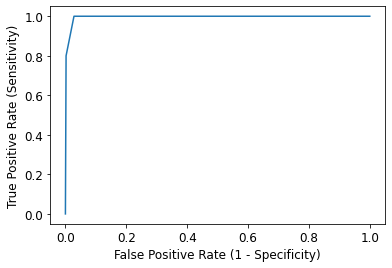

In [124]:
cfm = confusion_matrix(y_test, y_pred)
print('---------------Modelo actual: DT ---------------')
print("Matriz de confusión: \n",cfm)
#
TP = cfm[1, 1]
TN = cfm[0, 0]
FP = cfm[0, 1]
FN = cfm[1, 0]

print("\n", classification_report(y_test, y_pred))

print("\nSensitivity =" ,TP / float(FN + TP) )
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", TP / float(TP + FP)) 
print("Especificidad = ", TN / (TN + FP))

y_pred_prod_pos = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prod_pos)   
print("ROC-AUC = ", roc_auc_score(y_test, y_pred_prod_pos))
print("\n")

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

**Random Forest**

In [125]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [126]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 200}

In [127]:
#Bosques Aleatorios
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42, max_features='auto', 
                                  n_estimators= 200, max_depth=5, criterion='gini')
#Entreno el modelo
model_rf.fit(X_train, y_train)
#Realizo una predicción
y_pred = model_rf.predict(X_test)

---------------Modelo actual: DT ---------------
Matriz de confusión: 
 [[461   1]
 [  1   4]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.80      0.80      0.80         5

    accuracy                           1.00       467
   macro avg       0.90      0.90      0.90       467
weighted avg       1.00      1.00      1.00       467


Sensitivity = 0.8
Accuracy =  0.9957173447537473
Precision =  0.8
Especificidad =  0.9978354978354979
ROC-AUC =  0.9961038961038962




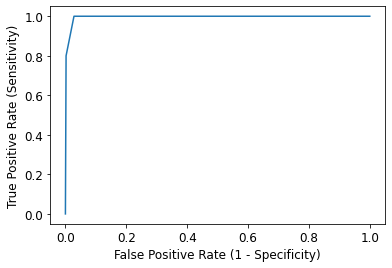

In [128]:
cfm = confusion_matrix(y_test, y_pred)
print('---------------Modelo actual: DT ---------------')
print("Matriz de confusión: \n",cfm)
#
TP = cfm[1, 1]
TN = cfm[0, 0]
FP = cfm[0, 1]
FN = cfm[1, 0]

print("\n", classification_report(y_test, y_pred))

print("\nSensitivity =" ,TP / float(FN + TP) )
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", TP / float(TP + FP)) 
print("Especificidad = ", TN / (TN + FP))

y_pred_prod_pos = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prod_pos)   
print("ROC-AUC = ", roc_auc_score(y_test, y_pred_prod_pos))
print("\n")

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

**Gradient Boosting**

In [129]:
GB = GradientBoostingClassifier()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [130]:
grid_GB = GridSearchCV(estimator=GB, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GB.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [131]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GB.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.04, max_depth=6, subsample=0.9)

 The best score across ALL searched params:
 0.9983905579399142

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


In [132]:
model_gb = GradientBoostingClassifier(learning_rate=0.04, max_depth=6, 
                                      subsample=0.9, n_estimators=100)
model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)

---------------Modelo actual: DT ---------------
Matriz de confusión: 
 [[461   1]
 [  1   4]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       0.80      0.80      0.80         5

    accuracy                           1.00       467
   macro avg       0.90      0.90      0.90       467
weighted avg       1.00      1.00      1.00       467


Sensitivity = 0.8
Accuracy =  0.9957173447537473
Precision =  0.8
Especificidad =  0.9978354978354979
ROC-AUC =  0.9961038961038962


cv


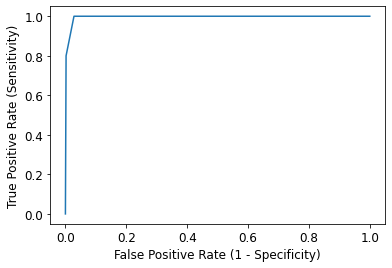

In [138]:
cfm = confusion_matrix(y_test, y_pred)
print('---------------Modelo actual: DT ---------------')
print("Matriz de confusión: \n",cfm)
#
TP = cfm[1, 1]
TN = cfm[0, 0]
FP = cfm[0, 1]
FN = cfm[1, 0]

print("\n", classification_report(y_test, y_pred))

print("\nSensitivity =" ,TP / float(FN + TP) )
print("Accuracy = ", accuracy_score(y_test, y_pred))
print("Precision = ", TP / float(TP + FP)) 
print("Especificidad = ", TN / (TN + FP))

y_pred_prod_pos = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prod_pos)  
print("ROC-AUC = ", roc_auc_score(y_test, y_pred_prod_pos))
print("\n")

cv = cross_val_score(model, X, y, cv=10)
print(cv)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

**CONCLUSIÓN**

Para esta etapa de generación de modelos de aprendizaje y evaluación de los mismos, se determinó, en primera instancia la variable target la cuál se decidió que fuera la de "Ingresados Si/No" en donde 1 representaba que el postulante si ingresó y 0 que no.

Posteriormente se determinó que los modelos a utilizar serían de clasificación y se definió el dataset para entrenamiento y prueba, teniendo así 20% de entrenamiento y 80% para prueba. Ahora bien, para encontrar el modelo más óptimo se realizó una evaluación de los siguientes modelos: 

*   SVC
*   LR
*   DT
*   GNB
*   RF
*   MLP

Una vez evaluados estos modelos con diferentes métricas como: Acuracy, matriz de confusión, precisión, sensitividad, especificidad, ROC-AUC, nos dimos cuenta que los modelos más óptimos fueron los de Random Forest, Gradient Boosting, Decision Tree. 

De igual manera se realizó un ajuste de hiperparámetros de los modelos y se evaluaron nuevamente para visualizar los cambios posterirores a los ajustes realizados. Finalmente se realizó la validación cruzada para evitar el overfitting. 






